<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(12)_%ED%9A%8C%EA%B7%80(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<08> 회귀**


## **1. 회귀 소개**

* 회귀: 여러 개의 독립변수(X)와 한 개의 종속변수(Y) 간의 상관관계를 모델링하는 기법

* 머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정값임

    -> 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

* 회귀의 종류

    * 독립 변수 개수 - 1개: 단일 회귀, 여러 개: 다중 회귀

    * 회귀 계수의 결합 - 선형: 선형 회귀, 비선형: 비선형 회귀

* 선형 회귀: 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식

    -> 규제(과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것) 방법에 따라 다시 별도의 유형으로 나뉨

    * 일반 선형 회귀: RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델

    * 릿지 : 선형회귀에 L2 규제를 추가한 회귀 모델. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델임
    
    * 라쏘 : 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것. L1 규제는 피처 선택 기능으로도 불림

    * 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함

    * 로지스틱 회귀 : 로지스틱 회귀는 매우 강력한 분류 알고리즘임. 일반적으로 이진 분류뿐만 아니라 최소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

---

## **2. 단순 선형 회귀를 통한 회귀 이해**

* 단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀

* Y = aX + b에서 기울기 a와 절편 b를 회귀 계수로 지칭함

* 잔차: 실제 값과 회귀 모델의 차이에 따른 오류

    -> 최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만든다는 것

* RSS: 잔차 제곱의 합, 회귀 계수를 통해 표현할 수 있음

    -> RSS는 회귀식의 독립변수(X)와 종속변수(Y)가 중심 변수가 아니라 회귀 계수가 중심 변수임을 인지하는 것이 매우 중요

    -> 학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주됨

    -> 회귀에서 RSS는 비용이며, 회귀 계수로 구성되는 RSS를 비용 함수 또는 손실 함수라고 함

---

## **3. 비용 최소화하기 - 경사 하강법 소개**

* 경사 하강법: 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 파라미터를 구하는 방식

    -> 반복적으로 비용 함수의 반환값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감

    -> 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용이라고 판단하고 그때의 W 값을 최적 파라미터로 반환
    
    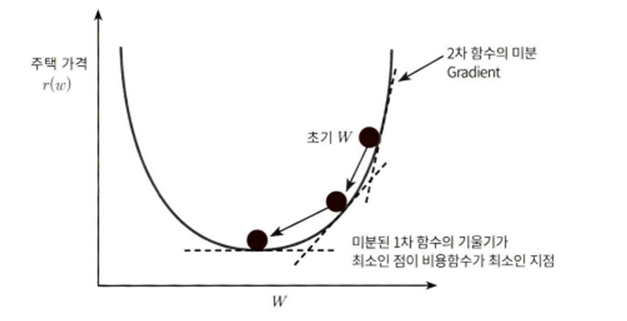

* RSS(w0, w1) = R(W)라고 하면 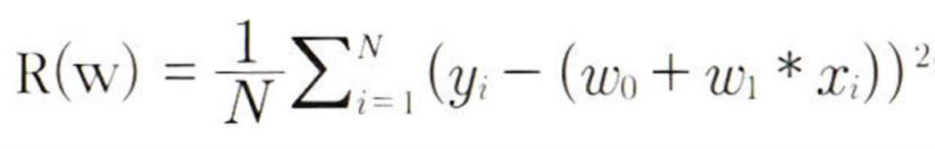

* R(w)를 w1, w0으로 편미분한 결과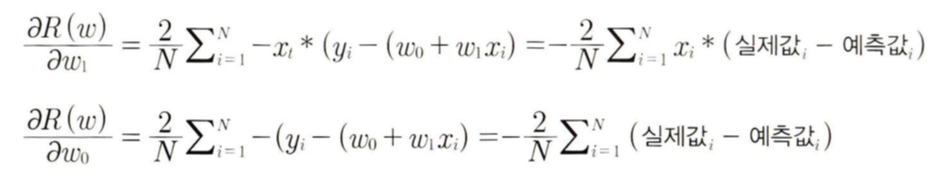

* 새로운 w1 = 이전 w1 - (학습률) * (편미분 결괏값)

 새로운 w0 = 이전 w0 - (학습률) * (편미분 결괏값)
    

* 경사 하강법의 일반적인 프로세스:

    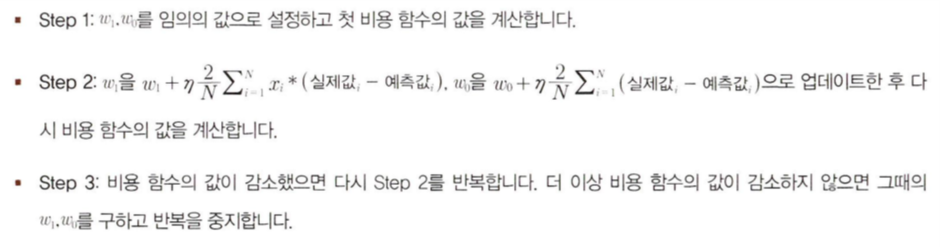

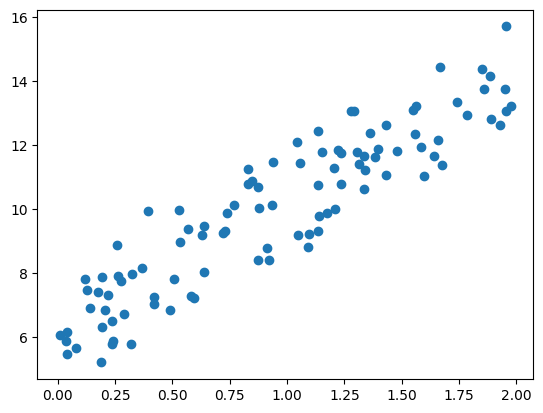

In [1]:
# 경사 하강법을 파이썬 코드로 구현
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# 'y=4X+6'을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

>> 데이터는 y=4X+6을 중심으로 무작위로 퍼져 있음

In [2]:
# 실제 y값과 예측값을 인자로 받아서 MSE를 계산하는 비용 함수 정의

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

In [3]:
# 경사 하강법을 함수를 생성해 구현

# w1과 w0를 업데이트 할 w1_update, w0_update를 반환하는 함수 생성
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w2_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트 할 w1_update, w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 업데이트 하는 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
# 최종적으로 예측값과 실제값의 MSE를 계산하는 함수 생성
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred)) / N
  return cost

In [6]:
# 경사 하강법의 예측 오류 계산
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f}, w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost: 0.9935


>> 실제 선형식인 y=4X+6과 유사하게 w1은 4.022, w0은 6.162가 도출됨

>> 예측 오류 비용은 0.9935임

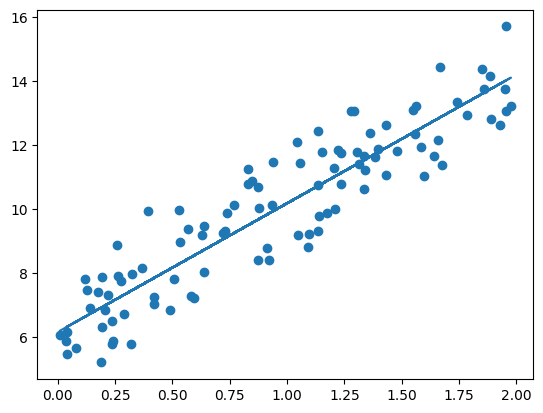

In [7]:
# y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)  

>> 경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있음

* 일반적인 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림

    -> 실전에서는 확률적 경사 하강법을 이용

* 확률적 경사 하강법: 전체 데이터가 아닌 일부 데이터로 w가 업데이트 되는 값을 계산함

In [8]:
# 미니 배치 확률적 경사 하강법을 구현하는 함수 생성
# gradient_descent_steps()과 크게 다르지 않지만 X, y를 랜덤하게 추출한다는 차이가 있음

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [9]:
# w1,w0 및 예측 오류 비용 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


>> 경사 하강법으로 구한 w1, w0과 큰 차이가 없으며 예측 오류 비용 또한 아주 조금 높음

>> 따라서 큰 데이터를 처리할 때는 일반적으로 확률적 경사 하강법을 이용

* 피처가 여러 개인 경우 경사 하강법을 이용해 회귀 계수 도출하기

   -> `y_pred = np.dot(X_matrix, W.T) + w0`를 이용해 계산 
   
   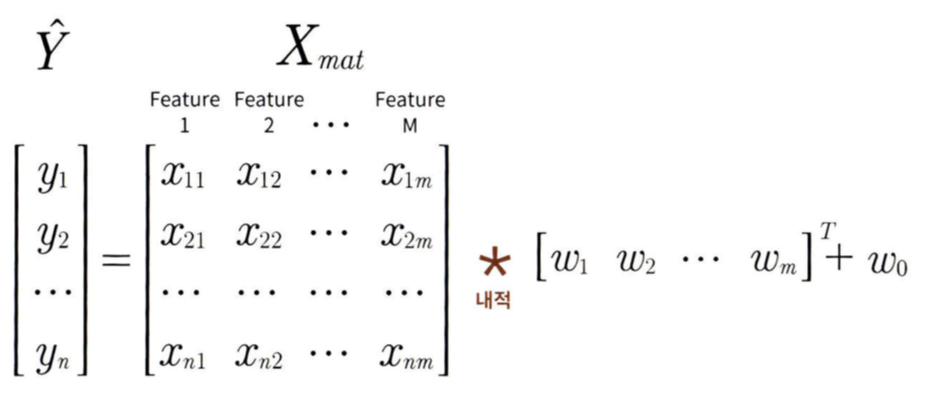


* w0을 W 배열 안에 포함시키기 위해서 X_matrix의 맨 처음 열에 모든 데이터의 값이 1인 피처를 추가

    -> `y_pred = np.dot(X_matrix, W.T)`로 계산 가능

    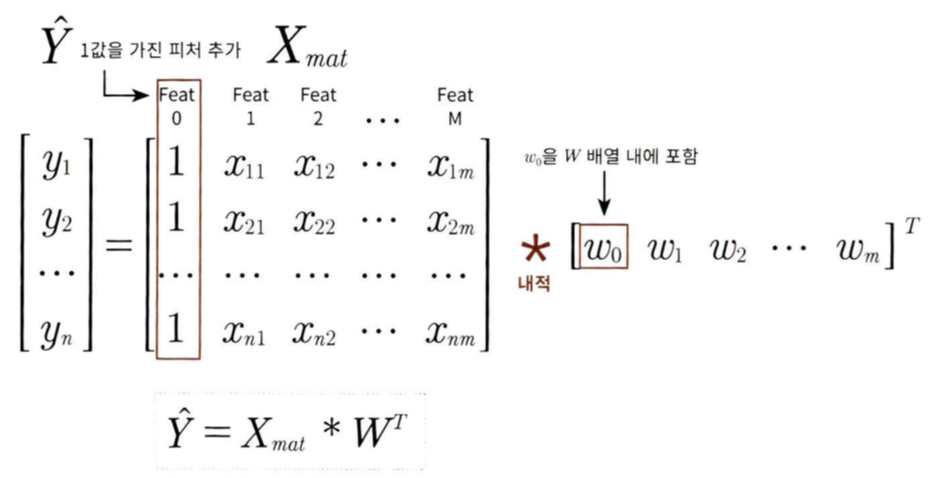

---

## **5. 다항 회귀와 과(대)적합/과소적합 이해**

### **5-1. 다항 회귀 이해**

* 다항 회귀: 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 회귀

    -> 다항 회귀는 비선형 회귀가 아니라 선형 회귀임!!!

    -> 선형/비선형 회귀의 구분은 독립 변수의 선형/비선형 여부가 아닌 회귀 계수의 선형/비선형 여부에 따름

* 사이킷런은 다항 회귀를 위한 클래스르 명시적으로 제공하지 않으므로 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함

* `PolynomialFeatures` 클래스: 피처를 다항식 피처로 변환

    -> degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

    -> fit(), transform() 메서드를 통해 변환 작업 수행

In [10]:
# PolynomialFeatures를 이용해 단항값을 2차 다항값으로 변환하는 예제
# [x1, x2] -> [1, x1, x2, x1^2, x1*x2, x2^2]

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


>> [1, 0, 1, 0^2, 0*1, 1^2]

>> [1, 2, 3, 2^2, 2*3, 3^2]

* 3차 다항 계수를 이용해 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도하기

In [11]:
# 3차 다항 회귀 함수: y = 1 + 2*x1 + 3*x1^2 + 4*x2^3
# 3차 다항 계수 피처 값이 입력되면 결정값을 반환하는 함수 생성

def polynomial_func(X):
    y = 1 + (2 * X[:, 0]) + (3 * X[:, 0]**2) + (4 * X[:, 1]**3)
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [12]:
# 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하여 다항 회귀로 구현

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


>> 일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남

>> 위 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀를 적용하면 회귀 계수가 10개로 늘어남

>> 다항 회귀로 근사하고 있음을 알 수 있음

* `Pipeline` 객체: 피처 변환과 선형 회귀 적용을 별도로 하지 않고 한 번에 다항 회귀를 구현함

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


---

### **5-2. 다항 회귀를 이용한 과소적합 및 과적합 이해**

* 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있음

    -> 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능

    -> 그러나 차수를 높일수록 과적합의 문제가 발생

In [14]:
# 데이터 세트: 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1

* 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교

    -> 다항식 차수별로 학습을 수행한 뒤 MSE 값을 구해 차수별 예측 성능을 평가

    -> 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 그리기


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree15 MSE는 181238256.56423894 입니다.


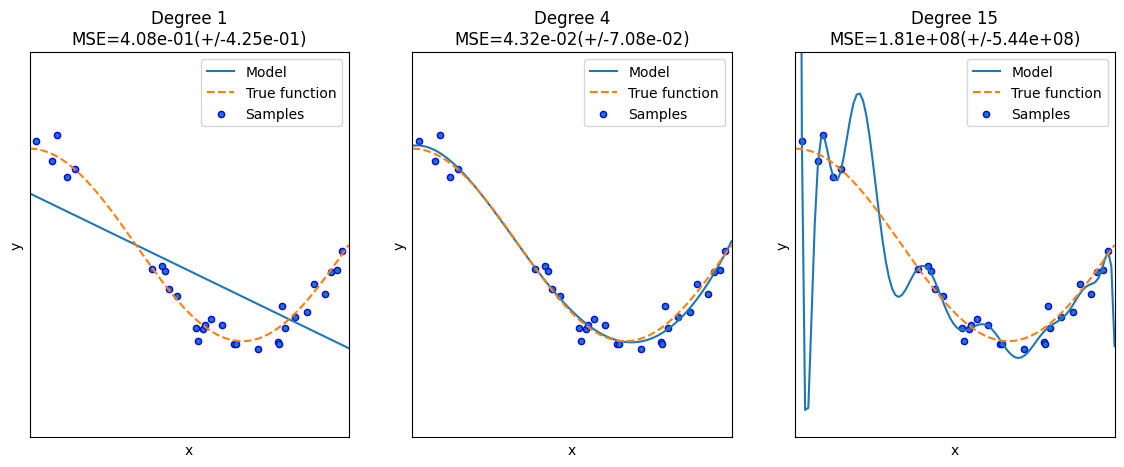

In [15]:
plt.figure(figsize=(14,5))
degrees=[1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree{0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE={:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

>> 실선은 다항 회귀 예측 곡선이고, 점선은 실제 데이터 세트 X, Y의 코사인 곡선임

>> Degree 1: 단순한 직선으로서 단순 선형 회귀와 같음. 예측 곡선이 학습 데이터의 패천을 제대로 반영하지 못하고 있는 과소적합 모델이 됨. MSE 값은 약 0.408.

>> Degree 4: 예측 곡선이 실제 데이터 세트와 유사함. 변동하는 잡음까지 예측하지는 못했지만 학습 데이터를 비교적 잘 반영함. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타냄.

>> Degree 15: MSE 값이 181238256으로 아주 높음. 예측 곡선이 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고 실제 곡선과는 완전히 다른 형태가 됨. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 됨.

>> 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델을 의미 

---

### **5-3. 편향-분산 트레이드오프(Bias-Variance Trade off)**

* 고편향성: 위의 Degree 1 모델처럼 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향 (과소적합)

* 고분산성: 위의 Degree 15처럼 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되고 지나치게 높은 변동성을 가지는 것 (과적합)

* 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음

    -> 편향과 분산이 서로 트레이드오프를 이루면서 오류 cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 모델

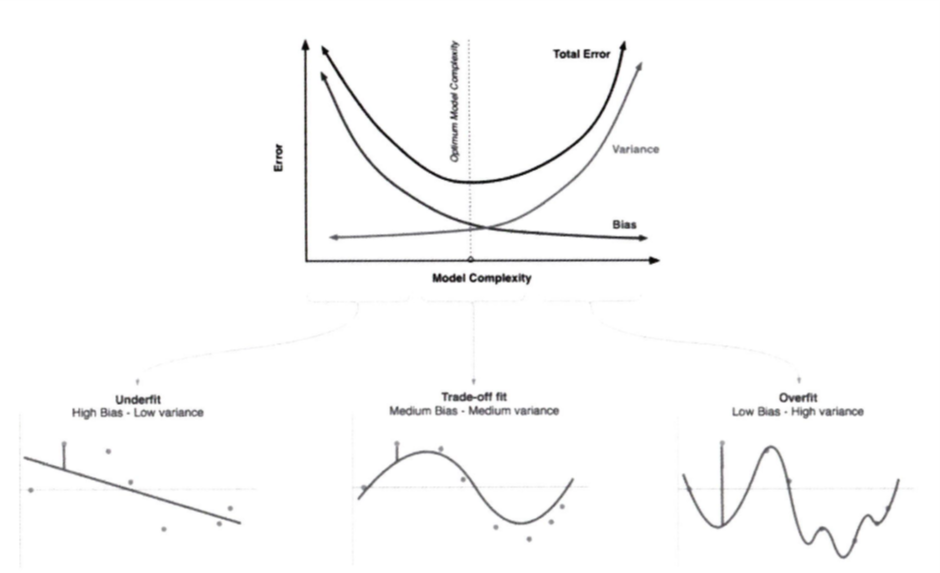
